# Channel models (Notebook)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

Let's begin by importing the standard libraries and the dendrotweaks library.

In [2]:
import dendrotweaks as dd
dd.__version__

'0.4.5'

In [3]:
dd.apply_dark_theme() # Set the theme for the plots

## Converting MOD to Python

The `MODFileConverter` class conveniently encapsulates the process of converting MOD files into Python code. Let's create an instance of this class.

In [4]:
converter = dd.biophys.io.MODFileConverter()

In [5]:
converter.reader, converter.parser, converter.generator

(<dendrotweaks.biophys.io.reader.MODFileReader at 0x7fc78636c7d0>,
 <dendrotweaks.biophys.io.code_generators.PythonCodeGenerator at 0x7fc7854d3910>)

In [6]:
cwd = os.getcwd()

In [7]:
path_to_mod_file = os.path.join(cwd, 'biophys', 'mod', 'NaKinetic.mod')
path_to_python = os.path.join(cwd, 'biophys', 'python', 'NaKinetic.py')
path_to_template = os.path.join(cwd, '..', 'Templates', 'default.py')

In [8]:
converter.convert(path_to_mod_file, path_to_python, path_to_template)

NotImplementedError: Conversion aborted: MOD files containing KINETIC blocks are not supported by DendroTweaks.

In [9]:
path_to_mod_file = os.path.join(cwd, 'biophys', 'mod', 'Na.mod')
path_to_python = os.path.join(cwd, 'biophys', 'python', 'Na.py')
path_to_template = os.path.join(cwd, '..', 'Templates', 'default.py')

In [10]:
converter.convert(path_to_mod_file, path_to_python, path_to_template)

Saved content to /home/roman/Documents/code/DendroTweaksLab/DendroTweaks/examples/Toy/biophys/python/Na.py


The conversion process involves reading a MOD file, parsing its content to build an abstract syntax tree representation, and then generating new code using a Jinja template.


The `MODReader` class reads the files, performs basic preprocessing steps like removing comments and empty lines, and splits the file content into distinct blocks.

In [11]:
blocks = converter.reader.get_blocks()

Split content into blocks:
    1 - TITLE
    1 - COMMENT
    1 - NEURON
    1 - UNITS
    1 - PARAMETER
    1 - ASSIGNED
    1 - STATE
    1 - BREAKPOINT
    1 - DERIVATIVE
    1 - INITIAL
    2 - FUNCTION
    1 - PROCEDURE
    0 - KINETIC


In [12]:
blocks

{'TITLE': ['TITLE Na channel\n'],
 'COMMENT': ['COMMENT\n26 Ago 2002 Modification of original channel to allow variable time\nstep and to correct an initialization error.\n    Done by Michael Hines(michael.hines@yale.e) and Ruggero\nScorcioni(rscorcio@gmu.edu) at EU Advance Course in Computational\nNeuroscience. Obidos, Portugal\n11 Jan 2007\n    Glitch in trap where (v/th) was where (v-th)/q is. (thanks Ronald\nvan Elburg!)\n\nna.mod\n\nSodium channel, Hodgkin-Huxley style kinetics.  \n\nKinetics were fit to data from Huguenard et al. (1988) and Hamill et\nal. (1991)\n\nMainen, Z. F., Joerges, J., Huguenard, J. R., & Sejnowski, T. J. (1995). \nA model of spike initiation in neocortical pyramidal neurons. \nNeuron, 15(6), 1427–1439. doi\nENDCOMMENT'],
 'NEURON': ['NEURON {\n\tSUFFIX Na\n\tUSEION na READ ena WRITE ina\n\tRANGE gbar, i, v12m, qm, v12ha, v12hb, qh, v12hinf, qhinf, Rma, Rmb, Rhb, Rha\n}'],
 'UNITS': ['UNITS {\n\t(mA) = (milliamp)\n\t(mV) = (millivolt)\n\t(S)  = (siemens)\n

The MOD files are parsed using the PyParsing library. The grammar used for parsing can be found in the `dendrotweaks/biophys/grammar.py` file. The parser generates an Abstract Syntax Tree (AST) from the MOD file. The AST is a hierarchical representation of the MOD file that can be used to generate Python code.

In [13]:
ast = converter.parser.get_ast()

In [14]:
ast

{'TITLE': ' Na channel',
 'COMMENT': '\n'
            '26 Ago 2002 Modification of original channel to allow variable '
            'time\n'
            'step and to correct an initialization error.\n'
            '    Done by Michael Hines(michael.hines@yale.e) and Ruggero\n'
            'Scorcioni(rscorcio@gmu.edu) at EU Advance Course in '
            'Computational\n'
            'Neuroscience. Obidos, Portugal\n'
            '11 Jan 2007\n'
            '    Glitch in trap where (v/th) was where (v-th)/q is. (thanks '
            'Ronald\n'
            'van Elburg!)\n'
            '\n'
            'na.mod\n'
            '\n'
            'Sodium channel, Hodgkin-Huxley style kinetics.  \n'
            '\n'
            'Kinetics were fit to data from Huguenard et al. (1988) and Hamill '
            'et\n'
            'al. (1991)\n'
            '\n'
            'Mainen, Z. F., Joerges, J., Huguenard, J. R., & Sejnowski, T. J. '
            '(1995). \n'
            'A model of spike in

The `PythonCodeGenerator` class generates Python code from the AST using a JINJA template file.

In [15]:
print(converter.generator.content)

# This Python channel class was automatically generated from a MOD file
# using DendroTweaks toolbox, dendrotweaks.dendrites.gr

import sys

from dendrotweaks.biophys.mechanisms import IonChannel
import numpy as np

class Na(IonChannel):
    """
    Na channel
    """

    def __init__(self, name="Na"):
        super().__init__(name=name)
        self.params = {
            "gbar": 0.0,
            "Rma": 0.182,
            "Rmb": 0.14,
            "v12m": -30,
            "qm": 9.8,
            "Rhb": 0.0091,
            "Rha": 0.024,
            "v12ha": -45,
            "v12hb": -70,
            "qh": 5,
            "v12hinf": -60,
            "qhinf": 6.2,
            "temp": 23,
            "q10": 2.3
            }
        self.range_params = {
            "gbar": 0.0,
            "Rma": 0.182,
            "Rmb": 0.14,
            "v12m": -30,
            "qm": 9.8,
            "Rhb": 0.0091,
            "Rha": 0.024,
            "v12ha": -45,
            "v12hb": -70,
           

## Working with channels

In [16]:
from dendrotweaks.biophys.io import create_channel

In [17]:
path_to_mod_file = os.path.join(cwd, 'biophys', 'mod', 'Na.mod')
path_to_python = os.path.join(cwd, 'biophys', 'python', 'Na.py')
path_to_template = os.path.join(cwd, '..', 'Templates', 'default.py')

In [18]:
na_channel = create_channel(path_to_mod_file, path_to_python, path_to_template)

Saved content to /home/roman/Documents/code/DendroTweaksLab/DendroTweaks/examples/Toy/biophys/python/Na.py


Got data for v in range -100.0 to 100.0 at 37°C


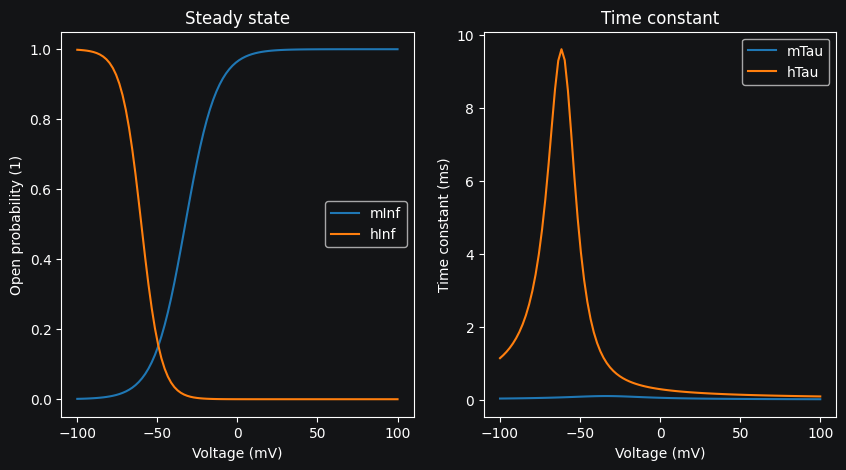

In [19]:
na_channel.plot_kinetics()

# Working with channels in a model

Let's create a simple point neuron model and add channels to it.

In [22]:
path_to_model = os.path.join(cwd)
print(f'Path to model: {path_to_model}')

Path to model: /home/roman/Documents/code/DendroTweaksLab/DendroTweaks/examples/Toy


In [23]:
model = dd.Model(path_to_model)

In [24]:
model.list_morphologies()

['ball-and-stick', 'point', 'simple-cell']

In [25]:
model.load_morphology(file_name='simple-cell')

Sorted PointTree(root=Point(idx=0), num_nodes=17).
Apical dendrite is already aligned.
Extended 6 nodes.
Sorted PointTree(root=Point(idx=0), num_nodes=23).


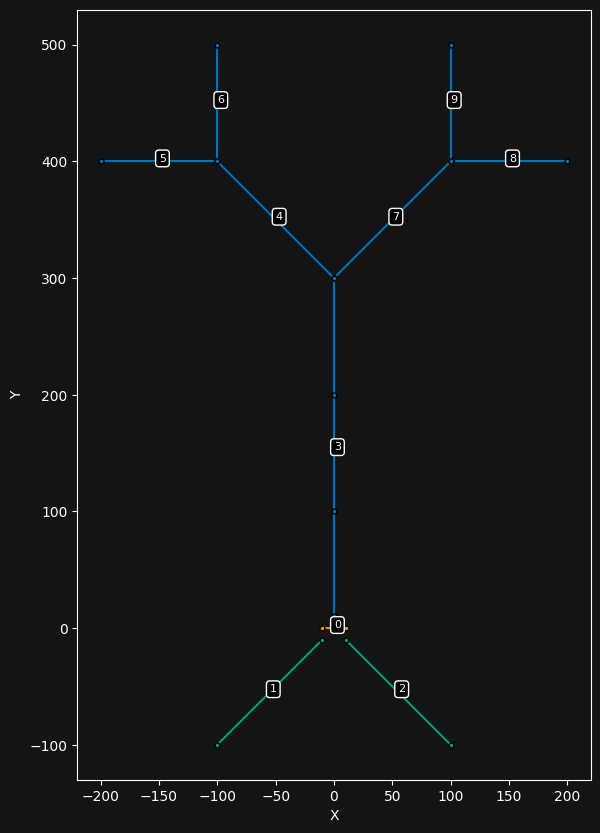

In [26]:
model.sec_tree.plot(
    show_points=True,
    annotate=True,
)

On the model level, we can create an ion channel using the `add_mechanism` method. First, let’s add the default mechanisms to the model, which include the leak channel, calcium dynamics and synaptic mechanisms.
Next, we add the sodium and potassium channels to the model.

In [27]:
model.add_default_mechanisms()
model.add_mechanism('Na')
model.add_mechanism('Kv')

Saved content to /home/roman/Documents/code/DendroTweaksLab/DendroTweaks/examples/Toy/biophys/python/Na.py
Saved content to /home/roman/Documents/code/DendroTweaksLab/DendroTweaks/examples/Toy/biophys/python/Kv.py


With these commands, we create Python objects from MOD files and add them to mechanisms. We also compile and load the MOD files, making them available in NEURON.

Once the ion channel is created, its kinetics can be visualized using the `plot_kinetics` method.

Got data for v in range -100.0 to 100.0 at 37°C


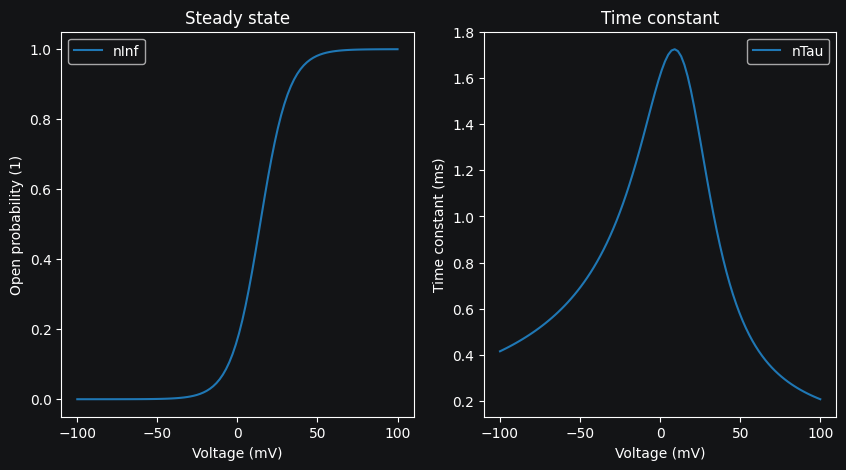

In [28]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
model.mechanisms['Kv'].plot_kinetics(ax=ax)

Each mechanism object is an instance of the `Mechanism` class, which contains information about the mechanism, such as its name and parameters. To examine the parameters of a specific mechanism, we can use the `params` attribute:

In [29]:
model.mechanisms['Kv'].params

{'gbar': 0.0,
 'Ra': 0.02,
 'Rb': 0.006,
 'v12': 25,
 'q': 9,
 'temp': 23,
 'q10': 2.3}

After uploading the mechanisms in the previous step, we now need to insert them into specific domains. In this example, we insert each of the three available mechanisms to all domains.

In [30]:
for domain_name in model.domains:
    for mech_name in model.mechanisms:
        model.insert_mechanism(mech_name, domain_name, distribute=False)

At this point, we have inserted the mechanisms into the membrane and set the default parameters for the model. We can inspect the parameters of the inserted mechanisms using the `df_params` or `params` attribute.

In [31]:
model.df_params[model.df_params['Mechanism'] == 'Kv']

,Mechanism,Parameter,Group,Distribution,Distribution params
24,Kv,gbar_Kv,all,constant,{'value': 0.0}
25,Kv,v12_Kv,all,constant,{'value': 25}
26,Kv,q_Kv,all,constant,{'value': 9}


Let's update channel conductances and run a simulation in out point neuron.

In [32]:
model.set_param('gbar_Leak', value=0.00015)
model.set_param('gbar_Na', value=0.03)
model.set_param('gbar_Na', group_name='somatic', value=0.05)
model.set_param('gbar_Kv', value=0.003)
model.set_param('gbar_Kv', group_name='somatic', value=0.005)

In [33]:
model.remove_all_stimuli()
model.remove_all_recordings()

soma = model.sec_tree[0]
model.add_recording(soma, loc=0.5)
model.add_iclamp(soma, loc=0.5, amp=0.1, delay=50, dur=200)

Recording added to sec NeuronSection(idx=0) at loc 0.5.
IClamp added to sec NeuronSection(idx=0) at loc 0.5.


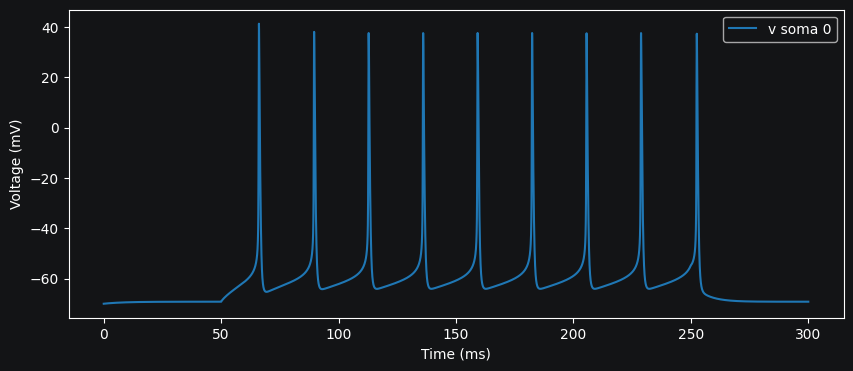

In [34]:
model.run(300)
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
model.simulator.plot_voltage(ax=ax)
t, v_orig = model.simulator.t, model.simulator.recordings['v'][soma(0.5)]

## Standardizing ion channel models

DendroTweaks provides a simple way to standardize voltage-gated ion channel models.

Assuming that we have an instance of a model with a custom sodium channel Na created before, we can standardize it with the `model.standardize_channel` method. The standard channel with the name `stdNa` (standard-Na) and very similar kinetics to the original channel model is created to replace the original channel model. This method also exports the standard channel model to a MOD file which is immediately loaded into the NEURON simulator.

Got data for v in range -100.0 to 100.0 at 37°C
Got data for v in range -100.0 to 100.0 at 23°C


(model.py, line 492)


Saved content to /home/roman/Documents/code/DendroTweaksLab/DendroTweaks/examples/Toy/biophys/mod/stdNa.mod
Got data for v in range -100.0 to 100.0 at 37°C


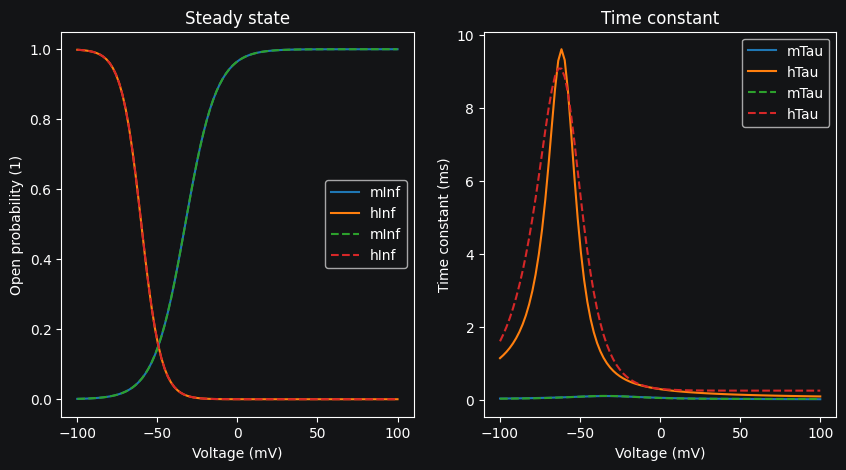

In [35]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
model.mechanisms['Na'].plot_kinetics(ax=ax)
model.standardize_channel('Na');
model.mechanisms['stdNa'].plot_kinetics(ax=ax, linestyle='--')

Let's do the same for the potassium channel:

Got data for v in range -100.0 to 100.0 at 37°C
Got data for v in range -100.0 to 100.0 at 23°C


(model.py, line 492)


Saved content to /home/roman/Documents/code/DendroTweaksLab/DendroTweaks/examples/Toy/biophys/mod/stdKv.mod
Got data for v in range -100.0 to 100.0 at 37°C


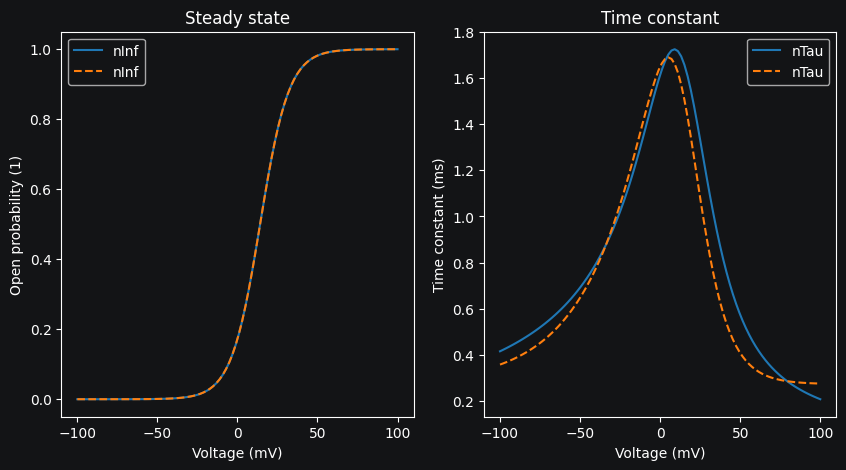

In [36]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
model.mechanisms['Kv'].plot_kinetics(ax=ax)
model.standardize_channel('Kv');
model.mechanisms['stdKv'].plot_kinetics(ax=ax, linestyle='--')

We can plot the voltage trace of the standardized model to compare it with the trace produced by the original  model.

In [37]:
model.run(300)

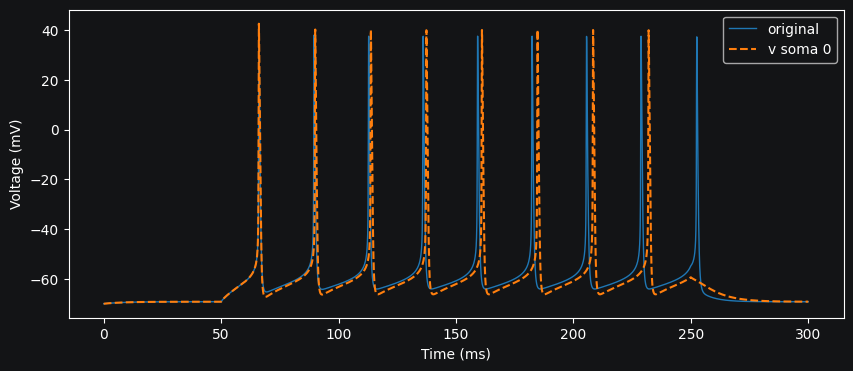

In [38]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
ax.plot(t, v_orig, color='C0', linestyle='-', zorder=0, lw=1, label='original')
model.simulator.plot_voltage(ax=ax, linestyle='--', color='C1')